In [147]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
user_data = pd.read_csv(r"user_data.csv")
user_data.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436
1,user_3028,63,52,0,India,17,1498998165,405.677,339.450,intermediate,1441893325
2,user_2268,226,203,-8,Egypt,24,1505566052,307.339,284.404,beginner,1454267603
3,user_480,611,490,1,Ukraine,94,1505257499,525.803,471.330,advanced,1350720417
4,user_650,504,479,12,Russia,4,1496613433,548.739,486.525,advanced,1395560498


In [148]:
def specific_values(arr):
    st = set()
    for j,i in user_data.iterrows():
        st.add(i[arr])
    return st,len(st)
user = user_data.copy()
user["follower_count"].describe()

count     3571.000000
mean        46.690563
std        211.494638
min          0.000000
25%          4.000000
50%         13.000000
75%         40.000000
max      10575.000000
Name: follower_count, dtype: float64

In [149]:
num_rank=np.array([])
for j,i in user.iterrows():
    if i["rank"]=="intermediate":
        num_rank=np.append(num_rank,2)
    if i["rank"]=="beginner":
        num_rank=np.append(num_rank,1)
    if i["rank"]=="advanced":
        num_rank=np.append(num_rank,3)
    if i["rank"]=="expert":
        num_rank=np.append(num_rank,4)
user["num_rank"]=num_rank
del user["rank"]

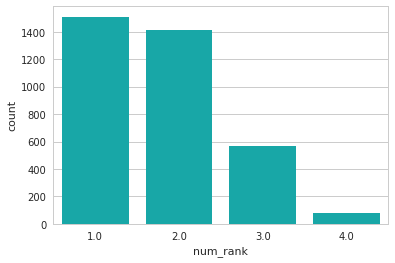

In [150]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x="num_rank", data=user, color="c")

In [151]:
train_sub = pd.read_csv(r"train_submissions.csv")
train_sub.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [152]:
train_sub["attempts_range"].describe()

count    155295.000000
mean          1.755028
std           1.078450
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: attempts_range, dtype: float64

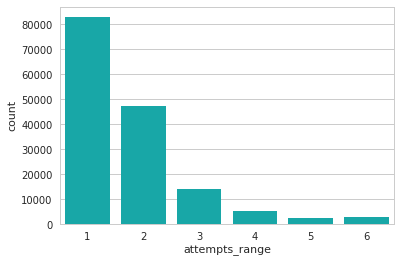

In [153]:
sns.set(style="whitegrid")
sns.countplot(x="attempts_range", data=train_sub, color="c")

In [154]:
from sklearn.preprocessing import normalize
temp = np.stack((list(user["submission_count"]),list(user["problem_solved"]),list(user["follower_count"]),list(user["max_rating"]),list(user["rating"])), axis=-1)
normalised = normalize(temp,norm="l2")
del user["submission_count"]
del user["problem_solved"]
del user["follower_count"]
del user["max_rating"]
del user["rating"]
temp_df = pd.DataFrame(normalised,columns=["submission_count","problem_solved","follower_count","max_rating","rating"])
user = user.join(temp_df)
user.head()

,user_id,contribution,country,last_online_time_seconds,registration_time_seconds,num_rank,submission_count,problem_solved,follower_count,max_rating,rating
0,user_3311,0,NaN,1504111645,1466686436,2.0,0.097031,0.082580,0.008258,0.719139,0.683035
1,user_3028,0,India,1498998165,1441893325,2.0,0.117647,0.097105,0.031746,0.757564,0.633891
2,user_2268,-8,Egypt,1505566052,1454267603,1.0,0.436391,0.391980,0.046342,0.593451,0.549165
3,user_480,1,Ukraine,1505257499,1350720417,3.0,0.577115,0.462825,0.088787,0.496643,0.445191
4,user_650,12,Russia,1496613433,1395560498,3.0,0.498718,0.473980,0.003958,0.542988,0.481426


In [155]:
temp=np.stack((list(user["last_online_time_seconds"]),list(user["registration_time_seconds"])), axis=-1)
normalised=normalize(temp,norm="l2")
del user["last_online_time_seconds"]
del user["registration_time_seconds"]
temp_df = pd.DataFrame(normalised,columns=["last_online_time_seconds","registration_time_seconds"])
user = user.join(temp_df)
user.head()

,user_id,contribution,country,num_rank,submission_count,problem_solved,follower_count,max_rating,rating,last_online_time_seconds,registration_time_seconds
0,user_3311,0,NaN,2.0,0.097031,0.082580,0.008258,0.719139,0.683035,0.715958,0.698143
1,user_3028,0,India,2.0,0.117647,0.097105,0.031746,0.757564,0.633891,0.720701,0.693246
2,user_2268,-8,Egypt,1.0,0.436391,0.391980,0.046342,0.593451,0.549165,0.719254,0.694747
3,user_480,1,Ukraine,3.0,0.577115,0.462825,0.088787,0.496643,0.445191,0.744280,0.667868
4,user_650,12,Russia,3.0,0.498718,0.473980,0.003958,0.542988,0.481426,0.731367,0.681984


In [156]:
from scipy.stats import pearsonr
print(pearsonr(list(user["rating"]),list(user["num_rank"])))
print(pearsonr(list(user["submission_count"]),list(user["problem_solved"]))) #important
print(pearsonr(list(user["max_rating"]),list(user["rating"])))
print(pearsonr(list(user["problem_solved"]),list(user["follower_count"])))

(-0.19732549733493832, 1.1166260064134714e-32)
(0.9911479870925087, 0.0)
(0.7715559020396346, 0.0)
(0.3826296654579502, 7.255740220621941e-125)


In [157]:
user_set = set()
for j,i in user.iterrows():
    user_set.add(i["user_id"])
train_sub.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [158]:
problem = pd.read_csv(r"problem_data.csv")
problem.head()

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [159]:
problem_copy = problem.copy()
print(type(problem_copy))
problem_copy = problem_copy.fillna(0)
problem_copy.head()

<class 'pandas.core.frame.DataFrame'>


,problem_id,level_type,points,tags
0,prob_3649,H,0.0,0
1,prob_6191,A,0.0,0
2,prob_2020,F,0.0,0
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [160]:
t=0
print(type(problem_copy))
for j,i in problem_copy.iterrows():
    if i["tags"]!=0:
        t+=1
print(t,len(problem_copy["tags"]))        

<class 'pandas.core.frame.DataFrame'>
3060 6544


In [161]:
t=0
for j,i in problem_copy.iterrows():
    if i["points"]!=0:
        t+=1
print(t,len(problem_copy["points"])) 

2627 6544


In [162]:

def most_common(lst):
    return max(set(lst), key=lst.count)

pb_taken = most_common(list(train_sub["problem_id"]))

In [163]:
user.head()

,user_id,contribution,country,num_rank,submission_count,problem_solved,follower_count,max_rating,rating,last_online_time_seconds,registration_time_seconds
0,user_3311,0,NaN,2.0,0.097031,0.082580,0.008258,0.719139,0.683035,0.715958,0.698143
1,user_3028,0,India,2.0,0.117647,0.097105,0.031746,0.757564,0.633891,0.720701,0.693246
2,user_2268,-8,Egypt,1.0,0.436391,0.391980,0.046342,0.593451,0.549165,0.719254,0.694747
3,user_480,1,Ukraine,3.0,0.577115,0.462825,0.088787,0.496643,0.445191,0.744280,0.667868
4,user_650,12,Russia,3.0,0.498718,0.473980,0.003958,0.542988,0.481426,0.731367,0.681984


In [164]:
problem_copy.head()

,problem_id,level_type,points,tags
0,prob_3649,H,0.0,0
1,prob_6191,A,0.0,0
2,prob_2020,F,0.0,0
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [165]:
train_sub_copy = train_sub.copy()
train_sub_copy.head()

,user_id,problem_id,attempts_range
0,user_232,prob_6507,1
1,user_3568,prob_2994,3
2,user_1600,prob_5071,1
3,user_2256,prob_703,1
4,user_2321,prob_356,1


In [166]:
contribution = list(user["contribution"])
#contribution.sort()

In [167]:
#sns.lineplot(x="problem_solved",y="submission_count", data=user)

In [168]:
user["problem_solved"].describe()

count    3571.000000
mean        0.287155
std         0.193688
min         0.000000
25%         0.114065
50%         0.266913
75%         0.453599
max         0.681749
Name: problem_solved, dtype: float64

In [169]:
def bootstrapping(attempts,samples,train):
    X=[]
    attribute_list=list(train)
    for j,i in train.iterrows():
        lst=[]
        if i["attempts_range"]==attempts:
            for k in range(len(attribute_list)):
                lst.append(i[attribute_list[k]])
            X.append(lst)   
    df = pd.DataFrame(X,columns=attribute_list)
    def bootstrap_resample(X, n=None):
        if n == None:
            n = len(X)
        
        resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
        X_resample = X[resample_i]
        return X_resample  
    boot_list=[]
    for i in range(8):
        boot_list.append(list(bootstrap_resample(df[attribute_list[i]],n=500)))
    new_boot_list=[]
    for i in range(samples):
        lst=[]
        for j in range(8):
            lst.append(boot_list[j][i])
        new_boot_list.append(lst)
    print(new_boot_list)    
    boot_df = pd.DataFrame(new_boot_list,columns=attribute_list)
    train = pd.concat([train,boot_df])
    return train

In [ ]:
def prediction(user_id,problem_id,user,train_sub):
    user_pb = []
    attempts = []
    for j,i in train_sub.iterrows():
        if i["problem_id"]==problem_id:
            attempts.append(i["attempts_range"])
            user_pb.append(i["user_id"]) 
            
    attributes = ["submission_count","num_rank","problem_solved","contribution","follower_count","max_rating","rating"]
    final_lst=[]
    for usr in user_pb:
        lst = []
        for j,i in user.iterrows():
            if i["user_id"] == usr:
                for k in attributes:
                    lst.append(i[k])
                final_lst.append(lst)
    train = pd.DataFrame(user_pb, columns=["user_id"])
    train = train.join(pd.DataFrame(final_lst,columns=attributes))
    print("train",train.head())
    attempts=[]
    for j,i in train_sub.iterrows():
        if i["problem_id"]==problem_id:
            attempts.append(i["attempts_range"])
    train = train.join(pd.DataFrame(attempts, columns=["attempts_range"]))  
    del train["user_id"]
    print("train",train.head())
    ######
    #########
    print("do you want to do bootstrapping")
    print(sns.countplot(x="attempts_range", data=train))
    inp = str(input())
    while inp=="y":
        bootstrap_attempt = int(input())
        count = int(input())
        train = bootstrapping(bootstrap_attempt,count,train)
        print(sns.countplot(x="attempts_range",data=train))
        print("do you want to do more bootstrapping")
        inp=str(input())
    final_lst=[]

    for j,i in train.iterrows():
        lst=[]
        for k in attributes:
            if k!="attempts_range":
                lst.append(i[k])
        final_lst.append(lst)
    attempts = train["attempts_range"]
    del train["attempts_range"]
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.cross_validation import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(final_lst, attempts, test_size=0.25, random_state=42)    
    clf = RandomForestClassifier(n_estimators=40, max_depth=10)
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(y_pred,Y_test))
    return train
train = prediction("user_3028","prob_5071",user.copy(),train_sub.copy())    

In [170]:
st=set()
for j,i in problem_copy.iterrows():
    st.add(i["level_type"])
st    

{0, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'}

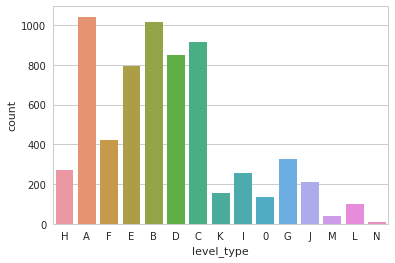

In [171]:
sns.countplot(x="level_type", data=problem_copy)

In [172]:
t=0
for j,i in problem_copy.iterrows():
    if i["problem_id"]=="prob_4369":
        t+=1
t        

1

In [173]:
level = [[0,0],[0,0],[0,0],[0,0],[0,0]]
for j,i in problem_copy.iterrows():
    if i["points"]!=0:
        if i["level_type"]=="A":
            level[0][0]+=int(i["points"])
            level[0][1]+=1
        if i["level_type"]=="B":
            level[1][0]+=int(i["points"])
            level[1][1]+=1
        if i["level_type"]=="C":
            level[2][0]+=int(i["points"])
            level[2][1]+=1
        if i["level_type"]=="D":
            level[3][0]+=int(i["points"])
            level[3][1]+=1
        if i["level_type"]=="E":
            level[4][0]+=int(i["points"])
            level[4][1]+=1 

In [174]:
len(problem_copy["problem_id"])

6544

In [175]:
level

[[293016, 561], [578014, 581], [752258, 500], [885250, 441], [1034250, 414]]

In [176]:
level_mean=[]
for i in level:
    level_mean.append(int(i[0]/i[1]))
level_mean    

[522, 994, 1504, 2007, 2498]

In [177]:
points=[]
for j,i in problem_copy.iterrows():
    if i["points"]==0:
        if i["level_type"]=="A":
            points.append(level_mean[0])
        elif i["level_type"]=="B":
            points.append(level_mean[1])
        elif i["level_type"]=="C":
            points.append(level_mean[2])
        elif i["level_type"]=="D":
            points.append(level_mean[3])
        elif i["level_type"]=="E":
            points.append(level_mean[4]) 
        else:
            points.append(i["points"])
    else:
        points.append(i["points"])
problem_copy["points"]=points
problem_copy.head()

,problem_id,level_type,points,tags
0,prob_3649,H,0.0,0
1,prob_6191,A,522.0,0
2,prob_2020,F,0.0,0
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [178]:
level = [0,0]
level_type = ["F","G","H","I"]
for j,i in problem_copy.iterrows():
    if i["points"]!=0:
        if i["level_type"] in level_type:
            level[0]+=i["points"]
            level[1]+=1
level_mean=int(level[0]/level[1])     
points=[]
for j,i in problem_copy.iterrows():
    if i["points"]==0:
        if i["level_type"] in level_type:
            points.append(level_mean)
        else:
            points.append(i["points"])
    else:
        points.append(i["points"]) 
problem_copy["points"]=points        
problem_copy.head(15)        

,problem_id,level_type,points,tags
0,prob_3649,H,2792.0,0
1,prob_6191,A,522.0,0
2,prob_2020,F,2792.0,0
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"
5,prob_1479,E,2498.0,0
6,prob_2940,B,994.0,0
7,prob_3059,B,5.0,brute force
8,prob_1958,D,2007.0,0
9,prob_6154,C,1504.0,0


In [179]:
level = [0,0]
level_type = ["J","K","L","M","N",0]
for j,i in problem_copy.iterrows():
    if i["points"]!=0:
        if i["level_type"] in level_type:
            level[0]+=i["points"]
            level[1]+=1
level_mean=int(level[0]/level[1])     
points=[]
for j,i in problem_copy.iterrows():
    if i["points"]==0:
        if i["level_type"] in level_type:
            points.append(level_mean)
        else:
            points.append(i["points"])
    else:
        points.append(i["points"]) 
problem_copy["points"]=points 

In [180]:
#problem_copy.head(15)

In [181]:
st = set(problem_copy["problem_id"])

In [182]:
len(st)

6544

In [183]:
test = train_sub_copy.sort_values(['problem_id'], ascending=True)
test = test.reset_index()
len(set(test["problem_id"]))
#because of this, there are NaN values.

5776

In [184]:
t=0
not_in_train_lst=[]
not_in_train = []
for j,i in problem_copy.iterrows():
    if i["problem_id"] not in set(train_sub_copy["problem_id"]):
            not_in_train_lst.append([i["problem_id"],i["level_type"],i["points"],i["tags"]])
            not_in_train.append(i["problem_id"])
len(not_in_train)         

768

In [185]:
index=[]
for p_id in not_in_train:
    t=0
    for j,i in problem_copy.iterrows():
        if i["problem_id"] == p_id:
            index.append(t)
            break
        t+=1    
index        

[5,
 12,
 18,
 19,
 34,
 36,
 39,
 43,
 47,
 53,
 72,
 79,
 106,
 110,
 123,
 140,
 153,
 155,
 165,
 187,
 199,
 205,
 221,
 226,
 248,
 250,
 275,
 314,
 316,
 323,
 328,
 333,
 334,
 348,
 365,
 383,
 388,
 391,
 413,
 462,
 469,
 484,
 510,
 517,
 528,
 529,
 530,
 539,
 542,
 550,
 552,
 553,
 559,
 560,
 563,
 571,
 586,
 598,
 600,
 601,
 609,
 618,
 628,
 634,
 641,
 646,
 658,
 675,
 682,
 683,
 693,
 697,
 700,
 702,
 705,
 721,
 729,
 732,
 734,
 739,
 746,
 750,
 753,
 757,
 760,
 764,
 771,
 774,
 776,
 792,
 795,
 796,
 800,
 802,
 807,
 814,
 818,
 819,
 836,
 850,
 853,
 855,
 876,
 880,
 885,
 895,
 906,
 908,
 939,
 951,
 953,
 954,
 982,
 986,
 989,
 997,
 998,
 1002,
 1005,
 1010,
 1021,
 1024,
 1025,
 1031,
 1038,
 1041,
 1042,
 1055,
 1059,
 1064,
 1068,
 1089,
 1090,
 1091,
 1095,
 1126,
 1131,
 1157,
 1161,
 1166,
 1175,
 1176,
 1187,
 1193,
 1210,
 1213,
 1221,
 1226,
 1243,
 1259,
 1281,
 1302,
 1312,
 1315,
 1320,
 1337,
 1340,
 1341,
 1374,
 1384,
 1385,
 13

In [186]:
print(len(problem_copy["problem_id"]))
t=0
for i in reversed(index):
    problem_copy = problem_copy.drop(problem_copy.index[i])
len(problem_copy["problem_id"])    

6544


5776

In [187]:
problem_copy.head() 

,problem_id,level_type,points,tags
0,prob_3649,H,2792.0,0
1,prob_6191,A,522.0,0
2,prob_2020,F,2792.0,0
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [188]:
st = set(train_sub_copy["problem_id"])
prev = "prob_1"
mean_val = []
attempts = []
for j,i in test.iterrows():
    nxt = i["problem_id"]
    if nxt!=prev:
        mean_val.append(sum(attempts)/len(attempts)) 
        attempts=[]
        prev=nxt
    attempts.append(i["attempts_range"])
    prev=i["problem_id"]
test = problem_copy.sort_values(["problem_id"], ascending=True)
#print(pd.DataFrame(mean_val, columns=["attempts_range"]))
#mean_val  

In [189]:
print(len(test["problem_id"]),len(mean_val))

5776 5775


In [190]:
#test = test.join(pd.DataFrame(mean_val,columns=["attempts_range"]))

In [191]:
test = test.reset_index()
test.head(10)

,index,problem_id,level_type,points,tags
0,4805,prob_1,A,522.0,0
1,5303,prob_10,I,2792.0,0
2,4375,prob_100,B,994.0,0
3,122,prob_1000,A,500.0,implementation
4,1845,prob_1001,D,2007.0,0
5,3299,prob_1002,A,500.0,"greedy,implementation"
6,2343,prob_1003,B,1000.0,greedy
7,3424,prob_1004,L,210.0,0
8,6314,prob_1005,B,1000.0,brute force
9,4773,prob_1006,H,2792.0,0


In [192]:
test = test.join(pd.DataFrame(mean_val, columns=["attempts_range"]))
test.head()

,index,problem_id,level_type,points,tags,attempts_range
0,4805,prob_1,A,522.0,0,1.500000
1,5303,prob_10,I,2792.0,0,6.000000
2,4375,prob_100,B,994.0,0,1.000000
3,122,prob_1000,A,500.0,implementation,1.207317
4,1845,prob_1001,D,2007.0,0,1.100000


In [193]:
level_type = []
level_dict = {0:0,"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"H":8,"I":9,"J":10,"K":11,"L":12,"M":13,"N":14}
for j,i in test.iterrows():
    if i["level_type"] in level_dict:
        level_type.append(level_dict[i["level_type"]])
#level_type        

In [194]:
test = test.join(pd.DataFrame(level_type, columns=["levl_type"]))


In [195]:
del test["level_type"]
test.head()

,index,problem_id,points,tags,attempts_range,levl_type
0,4805,prob_1,522.0,0,1.500000,1
1,5303,prob_10,2792.0,0,6.000000,9
2,4375,prob_100,994.0,0,1.000000,2
3,122,prob_1000,500.0,implementation,1.207317,1
4,1845,prob_1001,2007.0,0,1.100000,4


In [196]:
del test["index"]

In [197]:
test.tail(40)

,problem_id,points,tags,attempts_range,levl_type
5736,prob_957,522.0,0,2.333333,1
5737,prob_958,2498.0,0,1.000000,5
5738,prob_959,1000.0,implementation,1.333333,2
5739,prob_96,1500.0,"combinatorics,dp",1.666667,4
5740,prob_960,522.0,0,2.200000,1
5741,prob_961,210.0,0,1.800000,13
5742,prob_962,2007.0,0,2.000000,4
5743,prob_963,1000.0,sortings,1.354430,2
5744,prob_964,2000.0,"data structures,dfs and similar,dsu,graphs",1.765957,4
5745,prob_966,2500.0,"geometry,ternary search",1.333333,5


In [198]:
test=test.drop(test.index[5775])
test.tail()

,problem_id,points,tags,attempts_range,levl_type
5770,prob_994,522.0,0,2.50,1
5771,prob_995,522.0,0,1.00,1
5772,prob_996,210.0,0,2.00,13
5773,prob_997,1000.0,"bitmasks,brute force,implementation",1.36,2
5774,prob_998,2792.0,0,2.00,8


In [199]:
test.head()

,problem_id,points,tags,attempts_range,levl_type
0,prob_1,522.0,0,1.500000,1
1,prob_10,2792.0,0,6.000000,9
2,prob_100,994.0,0,1.000000,2
3,prob_1000,500.0,implementation,1.207317,1
4,prob_1001,2007.0,0,1.100000,4


In [200]:
set(test["levl_type"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [201]:
from sklearn.cluster import KMeans

In [202]:
Y = test["levl_type"]

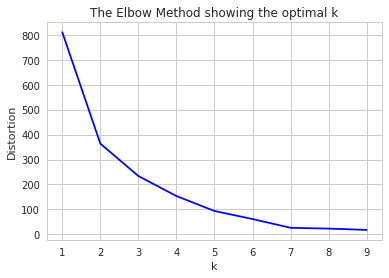

In [203]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
X = np.stack((test["points"],test["attempts_range"],test["levl_type"]), axis=-1)
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
import matplotlib.pyplot as plt
plt.plot()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [204]:
kmeans_3 = KMeans(n_clusters=3).fit(X)
kmeans_4 = KMeans(n_clusters=4).fit(X)
kmeans_5 = KMeans(n_clusters=5).fit(X)

In [205]:
for i in kmeans_3.labels_:
    print(type(i))
    break

<class 'numpy.int32'>


# Cluster Wise prediction of data made by Kmeans Algorithm

In [206]:
# Cluster Wise prediction of data made by Kmeans Algorithm

def predict_cluster_df(user_count_dict,user_index_dict,prob):
    attempts_final=[]    
    last_df_user = pd.DataFrame(columns=list(user))
    last_df_prob = pd.DataFrame(columns=list(test))
    for i in user_count_dict:
        for j in range(user_count_dict[i]):
            last_df_user = last_df_user.append(user.loc[user["user_id"] == i])
        for k in user_index_dict[i]:
            last_df_prob = last_df_prob.append(test.loc[test['problem_id'] == prob[k]])
    return last_df_user,last_df_prob
def last_df_make(last_df_user,last_df_prob):
    last_df_user = last_df_user.reset_index()
    del last_df_user["index"]
    last_df_prob = last_df_prob.reset_index()
    del last_df_prob["index"]
    last_df = last_df_user.join(last_df_prob)
    return last_df

In [207]:
prob_0=[]
prob_1=[]
prob_2=[]
t=0
for j,i in test.iterrows():
    if kmeans_3.labels_[t] == 0:
        prob_0.append(i["problem_id"])
    if kmeans_3.labels_[t] == 1:
        prob_1.append(i["problem_id"])
    if kmeans_3.labels_[t] == 2:
        prob_2.append(i["problem_id"])
    t+=1    
print(prob_0[1:5])        
def predict_cluster(problems):
    user_pb = []
    users_lst = []
    user_attempts = []
    prob=[]
    for j,i in train_sub_copy.iterrows():
        if i["problem_id"] in problems:
            user_pb.append(i["user_id"])
            prob.append(i["problem_id"])
            user_attempts.append(i["attempts_range"])            
    user_pb_set = set(user_pb)
    print(user_pb_set)
    user_count_dict = {}
    for i in user_pb_set:
        user_count_dict[i]=user_pb.count(i)
    #print(user_count_dict)    
    user_index_dict={}    
    for i in user_count_dict:
        ii=np.where(np.array(user_pb)==i)[0]
        user_index_dict[i]=ii
    print(user_index_dict)   
    return user_count_dict,user_index_dict,prob,user_attempts
def predict_it(prob_n):
    count_dict,index_dict,prob,user_attempts = predict_cluster(prob_n)
    df_user,df_prob = predict_cluster_df(count_dict,index_dict,prob)
    last_df = last_df_make(df_user,df_prob)
    return last_df,user_attempts

['prob_100', 'prob_1000', 'prob_1002', 'prob_1003']


In [208]:
df_0,user_attempts_0 = predict_it(prob_0)
df_1,user_attempts_1 = predict_it(prob_1)
df_2,user_attempts_2 = predict_it(prob_2)

{'user_2306', 'user_2509', 'user_992', 'user_2604', 'user_2931', 'user_1989', 'user_854', 'user_3319', 'user_2670', 'user_3369', 'user_631', 'user_3049', 'user_1419', 'user_599', 'user_1802', 'user_3246', 'user_2206', 'user_1268', 'user_615', 'user_2706', 'user_368', 'user_1151', 'user_2859', 'user_2204', 'user_2324', 'user_2808', 'user_2163', 'user_949', 'user_2785', 'user_961', 'user_2462', 'user_1168', 'user_485', 'user_2413', 'user_534', 'user_1004', 'user_1476', 'user_253', 'user_1011', 'user_55', 'user_887', 'user_602', 'user_1390', 'user_2333', 'user_3014', 'user_1050', 'user_2485', 'user_2186', 'user_1001', 'user_1834', 'user_1668', 'user_2051', 'user_2894', 'user_1459', 'user_1536', 'user_779', 'user_1156', 'user_846', 'user_15', 'user_323', 'user_2730', 'user_1889', 'user_1670', 'user_3371', 'user_1283', 'user_3058', 'user_2401', 'user_1285', 'user_690', 'user_2613', 'user_2574', 'user_2412', 'user_224', 'user_622', 'user_2544', 'user_1554', 'user_3311', 'user_2847', 'user_64

{'user_2306': array([    79,   3896,   5638,   5775,  13831,  15788,  18380,  27463,
        27976,  30895,  31729,  32288,  34985,  40089,  43199,  46025,
        49556,  52630,  52794,  55179,  61152,  67375,  70826,  74182,
        75982,  78306,  83110,  86425,  91649,  94169,  94537,  95271,
        95658,  98939,  99827, 103965]), 'user_2509': array([  970,  3037, 28342, 39264, 45887, 49139, 59995, 70253, 79218,
       94780]), 'user_992': array([  1351,   1632,  12449,  16164,  20680,  22216,  27380,  32100,
        34784,  36367,  38037,  39202,  39664,  55155,  63323,  67781,
        68399,  68646,  78665,  82231,  93058, 101147, 103624]), 'user_2604': array([  1379,   2133,   5625,   6162,   8242,  11943,  12677,  16986,
        17098,  18315,  20185,  21238,  21732,  22312,  22322,  27562,
        30966,  31641,  31701,  40670,  40985,  53479,  54227,  55260,
        57166,  63036,  64847,  71494,  80033,  84037,  84193,  87593,
        88134,  88688,  89849,  94232,  96717,

{'user_2306', 'user_992', 'user_2509', 'user_2604', 'user_1989', 'user_854', 'user_3319', 'user_2670', 'user_3369', 'user_631', 'user_3049', 'user_1419', 'user_599', 'user_1802', 'user_3246', 'user_1268', 'user_615', 'user_2706', 'user_368', 'user_1151', 'user_2859', 'user_2204', 'user_2324', 'user_2808', 'user_949', 'user_2163', 'user_2785', 'user_961', 'user_2462', 'user_485', 'user_1168', 'user_2413', 'user_534', 'user_1004', 'user_1476', 'user_253', 'user_1011', 'user_887', 'user_602', 'user_2186', 'user_1668', 'user_1001', 'user_2485', 'user_1050', 'user_3014', 'user_1834', 'user_2051', 'user_2894', 'user_1459', 'user_1536', 'user_779', 'user_1156', 'user_846', 'user_2730', 'user_1283', 'user_323', 'user_1889', 'user_1670', 'user_3371', 'user_15', 'user_1285', 'user_2613', 'user_2574', 'user_2412', 'user_224', 'user_622', 'user_2544', 'user_1554', 'user_3311', 'user_2847', 'user_645', 'user_1199', 'user_648', 'user_3567', 'user_501', 'user_901', 'user_1516', 'user_2195', 'user_304

{'user_2306': array([ 3652,  8449, 10688, 13790, 19004, 20329, 20763, 21032, 21543,
       25624, 26820, 27580, 29750]), 'user_992': array([  746,  2999,  3935,  7315,  8469, 12097, 12721, 18207, 18491,
       24577, 27037, 28862, 32322, 34523, 34835, 35503, 37449, 37704]), 'user_2509': array([10885, 22401, 32147, 32773]), 'user_2604': array([20553, 25622]), 'user_1989': array([  701,  1843,  3746,  7027,  8247,  9697,  9978, 10456, 12708,
       12823, 13870, 17200, 21309, 22655, 23372, 24723, 29733, 31802,
       31887, 32703, 33262, 35097, 35772, 37790]), 'user_854': array([17926, 22210, 23626, 25334, 27185, 33091, 36326]), 'user_3319': array([14411, 16255, 21875, 25428, 26065, 34144, 36532]), 'user_2670': array([ 1377,  3675,  8972, 15137, 15158, 18101, 31215, 34122]), 'user_3369': array([ 1430,  3849,  7694,  7870,  7902, 17886, 24380, 26522, 34195]), 'user_631': array([  997,  1482,  4733,  7085,  7267,  7469,  8251,  9974, 10147,
       10172, 10363, 12054, 12379, 12908, 15197, 

{'user_2306', 'user_992', 'user_1989', 'user_3319', 'user_3369', 'user_631', 'user_3049', 'user_1419', 'user_599', 'user_3246', 'user_2706', 'user_368', 'user_1151', 'user_2859', 'user_2324', 'user_2808', 'user_949', 'user_2163', 'user_2785', 'user_961', 'user_2462', 'user_485', 'user_1168', 'user_1004', 'user_1476', 'user_1011', 'user_887', 'user_602', 'user_1668', 'user_1001', 'user_2485', 'user_1050', 'user_1834', 'user_1459', 'user_1536', 'user_1156', 'user_846', 'user_2730', 'user_1283', 'user_1889', 'user_1670', 'user_3371', 'user_1285', 'user_2412', 'user_3311', 'user_645', 'user_1199', 'user_501', 'user_1516', 'user_901', 'user_2195', 'user_3044', 'user_1138', 'user_2104', 'user_1304', 'user_2901', 'user_644', 'user_2007', 'user_3353', 'user_373', 'user_2271', 'user_1830', 'user_256', 'user_1632', 'user_1232', 'user_2695', 'user_2516', 'user_3325', 'user_2991', 'user_2356', 'user_2750', 'user_114', 'user_933', 'user_2829', 'user_2269', 'user_2612', 'user_562', 'user_1496', 'use

{'user_2306': array([4832, 8086, 8558, 9032, 9799]), 'user_992': array([ 2865,  3414,  3581,  5321,  6291,  6784,  7342,  7373, 10154,
       10413, 10480, 10993, 12271]), 'user_1989': array([1213, 2382, 4519, 4598]), 'user_3319': array([ 4391,  5768, 11053, 11215]), 'user_3369': array([1073, 7624]), 'user_631': array([ 1918,  3287,  4317,  5462,  5872,  6821,  9435,  9748, 10475,
       11912]), 'user_3049': array([ 6028, 10967]), 'user_1419': array([10462]), 'user_599': array([  114,   367,   546,  3030,  3541,  3570,  3942,  4670,  6694,
        8075,  8172,  8941,  9777, 10716, 10857, 11069]), 'user_3246': array([3686, 6886, 9188, 9345, 9734]), 'user_2706': array([3188, 4943]), 'user_368': array([   91,  1985,  2105,  2266,  3849,  6169,  6832,  8009,  9154,
        9904, 10644, 12071]), 'user_1151': array([  122,  1162,  1786,  2614,  3075,  3742,  4772,  4904,  5774,
        5983,  8337,  8832,  9702, 10004, 10635, 10758]), 'user_2859': array([10336, 10836]), 'user_2324': array([

In [223]:
def finally_predict_it(df,attempts):
    print(list(df))
    #del df["user_id"]
    #del df["problem_id"]
    #del df["country"]
    #del df["tags"]
    print(list(df))
    attributes = list(df) 
    X = df[['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, attempts, test_size=0.33, random_state=42)
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=100, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    correct=0
    wrong=0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            correct+=1
        else:
            wrong+=1
    print("Accuracy",correct/len(y_pred))        
finally_predict_it(df_0,user_attempts_0)

['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']
['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']
Accuracy 0.4742948068855779


In [224]:
def finally_predict_it(df,attempts):
    print(list(df))
    del df["user_id"]
    del df["problem_id"]
    del df["country"]
    del df["tags"]
    print(list(df))
    attributes = list(df) 
    X = df[['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']]
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, attempts, test_size=0.33, random_state=42)
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=100, random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    correct=0
    wrong=0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            correct+=1
        else:
            wrong+=1
    print("Accuracy",correct/len(y_pred))
print("Second_cluster_accuracy")    
finally_predict_it(df_1,user_attempts_1)
print("Third_cluster_accuracy")    
finally_predict_it(df_2,user_attempts_2)

Second_cluster_accuracy
['user_id', 'contribution', 'country', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'problem_id', 'points', 'tags', 'attempts_range', 'levl_type']
['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']
Accuracy 0.3566919696364363
Third_cluster_accuracy
['user_id', 'contribution', 'country', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'problem_id', 'points', 'tags', 'attempts_range', 'levl_type']
['contribution', 'num_rank', 'submission_count', 'problem_solved', 'follower_count', 'max_rating', 'rating', 'last_online_time_seconds', 'registration_time_seconds', 'points', 'attempts_range', 'levl_type']
Accuracy 

# Kmeans clustering prediction ends here

# GMM clustering prediction starts from here

In [ ]:
#def prediction(user_id,problem_id,kmeans):
    index = test.index[test['problem_id'] == problem_id]
    prob_predict = [[]]
    for j,i in test.iterrows():
        if i["problem_id"] == problem_id:
            prob_predict[0].append(i["points"])
            prob_predict[0].append(i["attempts_range"])
            prob_predict[0].append(i["levl_type"])
            break
    print(prob_predict)
    cluster_pred = kmeans.predict(prob_predict)
    label = kmeans.labels_
    problems = []
    for i in range(len(label)):
        if label[i]==cluster_pred:
            problems.append(test.iloc[i]["problem_id"])  
    #similar problems are detected, now you have to collect user who have solved the problems collected and then apply
    #the required algo
    user_pb = []
    users_lst = []
    user_attempts = []
    prob = []
    for j,i in train_sub_copy.iterrows():
        if i["problem_id"] in problems:
            user_pb.append(i["user_id"])
            prob.append(i["problem_id"])
            user_attempts.append(i["attempts_range"])
    last_user_df = pd.DataFrame(columns = list(user))
    attributes=list(user)
    for usr in set(user_pb):
        df = user.loc[user['user_id'] == usr]
        last_user_df = last_user_df.append(df)
    last_user_df=last_user_df.reset_index()
    del last_user_df["index"]
    #######################################
    #########################################
    # Below Code is too big, try tomake it small
    # it will be making the final list 
    print(last_user_df)
            
prediction("user_3311","prob_2994",kmeans_4)    

In [ ]:
#def prediction(user_id,problem_id,kmeans):    
    # We got a User_id and a Problem_id, from which we have to predict the 
    # attempts that can be taken by the user on that particular problem.
    prob_predict = [[]]
    for j,i in test.iterrows():
        if i["problem_id"] == problem_id:
            prob_predict[0].append(i["points"])
            prob_predict[0].append(i["attempts_range"])
            prob_predict[0].append(i["levl_type"])
            break
    print(prob_predict)
    cluster_pred = kmeans.predict(prob_predict)
    label = kmeans.labels_
    problems = []
    for i in range(len(label)):
        if label[i]==cluster_pred:
            problems.append(test.iloc[i]["problem_id"])  
    #similar problems are detected, now you have to collect user who have solved the problems collected and then apply
    #the required algo
    user_pb = []
    users_lst = []
    user_attempts = []
    prob = []
    for j,i in train_sub_copy.iterrows():
        if i["problem_id"] in problems:
            user_pb.append(i["user_id"])
            prob.append(i["problem_id"])
            user_attempts.append(i["attempts_range"])
    user_pb_set = set(user_pb)
    user_count_dict = {}
    for i in user_pb_set:
        user_count_dict[i]=user_pb.count(i)
    #print(user_count_dict)    
    user_index_dict={}    
    for i in user_count_dict:
        ii=np.where(np.array(user_pb)==i)[0]
        user_index_dict[i]=ii
    #print(user_index_dict)    
    attempts_final=[]    
    last_df_user = pd.DataFrame(columns=list(user))
    last_df_prob = pd.DataFrame(columns=list(test))
    for i in user_count_dict:
        for j in range(user_count_dict[i]):
            last_df_user = last_df_user.append(user.loc[user["user_id"] == i])
        for k in user_index_dict[i]:
            last_df_prob = last_df_prob.append(test.loc[test['problem_id'] == prob[k]])
    last_df_user = last_df_user.reset_index()
    del last_df_user["index"]
    last_df_prob = last_df_prob.reset_index()
    del last_df_prob["index"]
    last_df = last_df_user.join(last_df_prob)
    del last_df["tags"]
    del last_df["country"]
    
    return last_df,user_attempts
            
            
user_id="user_3311"
problem_id = "prob_2994"
df_to_predict,user_attempts = prediction("user_3311","prob_2994",kmeans_4)       

In [ ]:
user_id="user_3311"
problem_id = "prob_2994"
for j,i in df_to_predict.iterrows():
    if i["user_id"]==user_id and i["problem_id"]==problem_id:
        df_to_predict = df_to_predict[df_to_predict.user_id != user_id]
        break
del df_to_predict["user_id"]
del df_to_predict["problem_id"]

In [ ]:
for i in list(df_to_predict):
    for j in list(df_to_predict):
        if i!=j:
            print(i,j,"-->",pearsonr(list(df_to_predict[i]),list(df_to_predict[j])))
    print("")        

# Applying PCA

In [ ]:
attributes = list(df_to_predict)
X=np.stack(df_to_predict[attributes])
mean_vec = np.mean(list(X), axis=0)
cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)